In [2]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts

In [33]:
import importlib 
importlib.reload(eeg_stat_ts)

<module 'eeg_stat_ts' from '/user/work/ko20929/eeg_ts/src/eeg_stat_ts.py'>

In [3]:
t1 = time.time()

data_types = ['N2', 'N3','REM', 'N1', 'Wake']
data_type = 'Wake'

for data_type in ['N2', 'N3', 'REM', 'N1', 'Wake']:
    channels = constants.channel_list
    
    # 1. generate all path names and class list(s) etc. 
    folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/'
    paths = joblib.load(folder + data_type + '_paths.pkl') # keys : ['selected_paths', 's_class_list', 's_night_list', 's_sleep_type', 's_p_id']
    
    # 2. Load corresponding data into dataframes, store in dataframe list
    df_list = []
    
    with io.capture_output() as captured:
        for path in paths['selected_paths']:
            data_epo = mne.read_epochs(path)
            data = data_epo._data * 1e6  # convert signal from V to uV
            df_full = data_epo.to_data_frame()
            df = df_full[channels].copy()
            df_list.append(df)
    
    ts_row_list = []
    
    for df in df_list:
        #1. Calculate bpw values
        psd_normalised_df = eeg_stat_ts.gen_psd_normalised(df, list( df.columns ) , win_s = 8 , samp_freq = 256, cut_off_freq = 0.5 , upper_cut_off = 40)
        psd_normalised_df['window_no.'] = 0
        
        #2. Convert bpw per channel into bpw per region
        regional_df = eeg_stat_ts.convert_chan_stats_to_region(psd_normalised_df, constants.channel_list , constants.region_to_channel_dict)
        
        #4. Convert into a single row of a new dataframe where each cell is a series
        new_row = eeg_stat_ts.dataframe_to_ts_row(regional_df, list(regional_df.columns[:-1]), time_steps = False )
        ts_row_list.append(new_row)
    
    ts_df = pd.DataFrame.from_records(ts_row_list)
    
    joblib.dump(ts_df, data_type + '_psd_normalised_data.pkl')

t2 = time.time()
time_taken = t2-t1

In [44]:
joblib.dump(ts_df, 'Wake_psd_normalised_data.pkl')

['Wake_psd_normalised_data.pkl']

In [43]:
ts_df

,0.5_Central,0.625_Central,0.75_Central,0.875_Central,1.0_Central,1.125_Central,1.25_Central,1.375_Central,1.5_Central,1.625_Central,...,38.875_Right Temporal,39.0_Right Temporal,39.125_Right Temporal,39.25_Right Temporal,39.375_Right Temporal,39.5_Right Temporal,39.625_Right Temporal,39.75_Right Temporal,39.875_Right Temporal,40.0_Right Temporal
0,0.004286,0.007408,0.008774,0.008781,0.008583,0.008144,0.007447,0.006855,0.005644,0.005500,...,0.000279,0.000266,0.000212,0.000303,0.000260,0.000260,0.000309,0.000306,0.000287,0.000270
1,0.008355,0.010632,0.018035,0.034025,0.014258,0.007883,0.006923,0.007412,0.006120,0.006714,...,0.000326,0.000262,0.000236,0.000279,0.000261,0.000269,0.000305,0.000282,0.000260,0.000267
2,0.010608,0.019466,0.024304,0.021993,0.022273,0.021773,0.021321,0.025351,0.018454,0.010839,...,0.000267,0.000293,0.000317,0.000271,0.000249,0.000248,0.000229,0.000210,0.000258,0.000274
3,0.008120,0.011119,0.013541,0.017949,0.012797,0.006085,0.006876,0.007012,0.005586,0.005804,...,0.000354,0.000365,0.000447,0.000507,0.000539,0.000357,0.000429,0.000357,0.000383,0.000377
4,0.005172,0.009393,0.010602,0.008510,0.009135,0.010980,0.021749,0.013822,0.005806,0.006279,...,0.001956,0.002322,0.002571,0.002237,0.002193,0.002010,0.002244,0.002467,0.002319,0.002023
5,0.013064,0.018923,0.018514,0.015493,0.018676,0.040306,0.032550,0.011338,0.009356,0.008264,...,0.001098,0.000997,0.001246,0.001492,0.001344,0.001166,0.001203,0.001190,0.001128,0.001137
6,0.020101,0.028977,0.032784,0.033996,0.033343,0.026419,0.018530,0.019297,0.015904,0.015646,...,0.000847,0.000930,0.000922,0.000732,0.000730,0.000951,0.001003,0.000744,0.000641,0.000639
7,0.014554,0.020051,0.026988,0.029643,0.028256,0.021015,0.018664,0.015311,0.013511,0.014327,...,0.000849,0.000764,0.000749,0.000973,0.000934,0.000762,0.000694,0.000869,0.000747,0.000702
8,0.020966,0.030731,0.039933,0.043549,0.041081,0.032352,0.028577,0.020963,0.018925,0.015736,...,0.000427,0.000569,0.000520,0.000430,0.000452,0.000387,0.000433,0.000403,0.000502,0.000456
9,0.026818,0.035490,0.037307,0.035973,0.035914,0.026135,0.020578,0.019841,0.015476,0.012840,...,0.000402,0.000512,0.000492,0.000429,0.000388,0.000418,0.000434,0.000420,0.000402,0.000406


In [42]:
time_taken

22.41376280784607

In [39]:
psd_normalised

,0.500,0.625,0.750,0.875,1.000,1.125,1.250,1.375,1.500,1.625,...,38.875,39.000,39.125,39.250,39.375,39.500,39.625,39.750,39.875,40.000
Fp1,0.007616,0.011393,0.014576,0.019191,0.011435,0.012831,0.017512,0.017406,0.015995,0.014398,...,0.000438,0.000372,0.000377,0.000523,0.000503,0.000596,0.000432,0.000380,0.000480,0.000239
Fpz,0.009345,0.013845,0.016369,0.020271,0.013462,0.015472,0.019785,0.020610,0.015764,0.015594,...,0.000231,0.000295,0.000191,0.000204,0.000242,0.000231,0.000159,0.000273,0.000286,0.000173
Fp2,0.006430,0.011000,0.014826,0.022365,0.015509,0.012882,0.016110,0.021953,0.018772,0.019884,...,0.000358,0.000340,0.000214,0.000274,0.000299,0.000279,0.000297,0.000298,0.000290,0.000199
F1,0.006692,0.006358,0.009308,0.008808,0.004941,0.007205,0.006078,0.007374,0.006334,0.003254,...,0.000315,0.000251,0.000287,0.000274,0.000274,0.000255,0.000179,0.000181,0.000334,0.000163
Fz,0.004329,0.004178,0.006329,0.006751,0.007974,0.007499,0.007587,0.005826,0.004715,0.003293,...,0.000308,0.000253,0.000174,0.000226,0.000201,0.000228,0.000193,0.000236,0.000192,0.000190
F2,0.006405,0.006225,0.007220,0.006572,0.006742,0.005595,0.007126,0.006618,0.006871,0.005614,...,0.000221,0.000294,0.000173,0.000184,0.000211,0.000220,0.000231,0.000234,0.000161,0.000226
AF7,0.011116,0.009883,0.013951,0.017983,0.017720,0.010819,0.014560,0.015283,0.011954,0.010925,...,0.000448,0.000527,0.000610,0.000926,0.000494,0.000447,0.000498,0.000363,0.000556,0.000491
F7,0.005446,0.008252,0.013015,0.015019,0.011885,0.009088,0.014285,0.010975,0.005524,0.006520,...,0.000658,0.000517,0.000489,0.000686,0.000552,0.000333,0.000437,0.000433,0.000449,0.000425
F5,0.003001,0.004364,0.004023,0.005330,0.005143,0.008394,0.010100,0.007623,0.004737,0.005354,...,0.000732,0.000756,0.000819,0.001346,0.000779,0.000874,0.000917,0.000628,0.000875,0.000871
F3,0.004845,0.004931,0.005630,0.008063,0.006547,0.009922,0.007973,0.005578,0.005315,0.003870,...,0.000538,0.000471,0.000448,0.000509,0.000347,0.000391,0.000354,0.000300,0.000501,0.000417


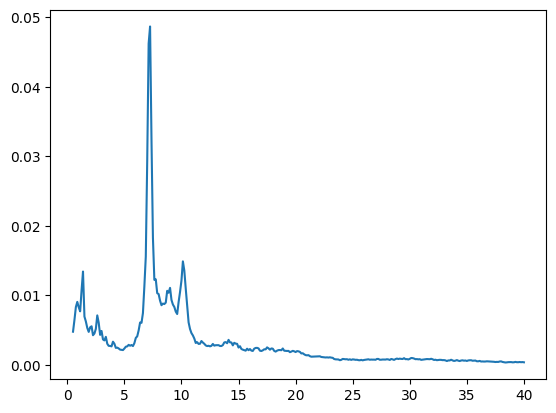

In [38]:
psd_normalised = eeg_stat_ts.gen_psd_normalised(df, list( df.columns ) , win_s = 8 , samp_freq = 256, cut_off_freq = 0.5 , upper_cut_off = 40)
mean_df = pd.DataFrame( psd_normalised.mean(axis = 0) )
plt.plot(mean_df.index, mean_df.values)

In [10]:
df = df_list[0]
bpw_df = eeg_stat_ts.gen_band_power_vals_and_freq_ratios(df, list(df.columns), win_s = 8)    
bpw_df['window_no.'] = 0
#2. Convert bpw per channel into bpw per region
regional_df = eeg_stat_ts.convert_chan_stats_to_region(bpw_df, constants.channel_list , constants.region_to_channel_dict)
regional_df

,Delta,Theta,Low_Alpha,Alpha,High_Alpha,Sigma,Beta,Gamma,TotalAbsPow,Fast_ratio,Alpha_shift,window_no.
Prefrontal,0.484060,0.182710,0.145540,0.112435,0.028488,0.043603,0.127727,0.049466,65.952521,0.361536,5.103328,0.0
Frontal,0.111016,0.383982,0.438467,0.232694,0.063562,0.069866,0.130546,0.071896,54.161331,0.734414,6.954988,0.0
Left Frontal,0.166337,0.262967,0.286567,0.184876,0.045756,0.086564,0.212864,0.086391,52.760335,0.950379,6.708444,0.0
Right Frontal,0.246774,0.262119,0.280773,0.201863,0.060673,0.070250,0.161735,0.057259,46.809171,0.725338,4.756819,0.0
Central,0.133384,0.363460,0.385395,0.207255,0.064340,0.114314,0.153863,0.027724,42.522282,0.736820,7.157981,0.0
Left Central,0.114013,0.278834,0.319462,0.280909,0.087292,0.114067,0.170004,0.042173,44.867698,1.172942,4.269368,0.0
Right Central,0.131302,0.295022,0.327271,0.272526,0.088079,0.111440,0.158397,0.031314,34.523351,1.147652,4.396263,0.0
Left Temporal,0.199522,0.329384,0.366831,0.200378,0.041853,0.076738,0.139358,0.054620,81.858057,0.645322,8.994560,0.0
Right Temporal,0.159398,0.488953,0.505140,0.154827,0.034874,0.073245,0.096049,0.027527,56.171060,0.394989,14.766051,0.0
Parietal,0.132165,0.224497,0.277775,0.416888,0.150186,0.090645,0.106301,0.029504,38.153119,1.470997,1.862390,0.0
